# 🐾 Animal Classification Model: Vertebrate vs. Invertebrate

This is my first image classification model using deep learning with PyTorch.  
The model classifies images of animals into two broad categories:
- **Vertebrates** (animals with a backbone)
- **Invertebrates** (animals without a backbone)

---

### 🔍 Goal

I built this project to **put the concepts I’ve been learning into real practice** and to deepen my understanding through hands-on experience.  
I wanted to not just study theory but actually **build something end-to-end**, face challenges, and learn from fixing real errors.

Along with that, my other goals were to:
- Understand how image classification works using CNNs (Convolutional Neural Networks)
- Apply deep learning skills to a small custom dataset
- Explore the full pipeline: model building, training, and evaluation
- Try using Fastai for the first time to simplify deep learning workflows

---

### 📦 Tools Used
- Python  
- PyTorch  
- Fastai  
- Kaggle Datasets


Let’s dive in! 🚀


<details>
<summary>⚙️ Setup: Internet Connection Check (Click to expand if curious)</summary>

This bit of code is just to check if the notebook has internet access.  
I included it because sometimes the notebook needs to download stuff to work properly.

If you’re just here to look at the project and results, you can skip this cell — it won’t affect anything important.

</details>



In [ ]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

<details>
<summary>📦 Setup: Installing and Importing Libraries (Click to expand)</summary>

In this cell, I’m installing the packages I need (`fastai` and `kaggle`) and importing some libraries to help me build and train my image classifier.

- `fastai` makes working with deep learning and computer vision easier for me as I’m still learning.
- `zipfile`, `os`, and `pathlib` help me manage files and folders.

If you’re just interested in seeing the model and results, you can skip this part.  
It’s only really important if you want to run or change the code yourself.

</details>


In [4]:
!pip install -Uqq fastai kaggle

from fastai.vision.all import *
import zipfile, os
from pathlib import Path


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.6 MB/s eta 0:00:00:00:0100:01


### 📁 Loading the Dataset

I’m using Python’s `Path` library to point to the folder where my dataset is stored.  
To make sure everything uploaded correctly, I list the files and folders inside this directory.  

If you try this yourself, remember to update the `data_path` to match your dataset’s folder name.


In [5]:
from pathlib import Path

# Path to the uploaded dataset folder
data_path = Path("/kaggle/input/kaggle-json")  

# List files/folders inside the dataset directory
print(list(data_path.iterdir()))

[Path('/kaggle/input/kaggle-json/kaggle.json')]


### 🔐 Setting Up Kaggle API Access

Here, I’m moving my `kaggle.json` file (which contains my Kaggle API credentials) into the right folder so I can access Kaggle datasets directly from the notebook.

I also set the file permissions to keep it secure.  

If you want to run this part yourself, make sure to update the file paths if your folder names are different.


In [7]:
import json
import zipfile
import os
from pathlib import Path
import shutil

# Move kaggle.json to the proper directory
!mkdir -p ~/.kaggle
shutil.copy("/kaggle/input/kaggle-json/kaggle.json", "/root/.kaggle/kaggle.json")  # adjust folder name if needed

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

### 🐾 Downloading and Extracting the Animals10 Dataset

In this step, I’m using the Kaggle API to download the Animals10 dataset right into my notebook.

After downloading, I unzip the dataset into a folder called `animals10` so I can start working with the images.

Finally, I check what’s inside the folder to make sure everything downloaded and extracted properly.


In [8]:
# Download the animals10 dataset
!kaggle datasets download -d alessiocorrado99/animals10
!unzip -q animals10.zip -d animals10

# Check what we have
import os
print(os.listdir("animals10"))

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 87%|██████████████████████████████████▋     | 507M/586M [00:00<00:00, 1.06GB/s]
100%|████████████████████████████████████████| 586M/586M [00:00<00:00, 1.06GB/s]
['translate.py', 'raw-img']


### 🔁 Fixing a Dataset Folder Conflict

When I was re-running this notebook from the beginning, I got an error saying that the `animals10` folder already existed.  

To fix it, I added a step to remove the existing folder before re-downloading and unzipping the dataset.  
This helped avoid the “folder already exists” issue and made sure I had a clean copy to work with.

It was a small error, but it reminded me how important it is to clean things up before re-running code — something I’ll keep in mind for future projects too!


In [9]:
# Remove old folder if it exists
!rm -rf animals10

# Re-download and unzip fresh
!kaggle datasets download -d alessiocorrado99/animals10
!unzip -q animals10.zip -d animals10

# Check what's inside
import os
print(os.listdir("animals10"))


Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
animals10.zip: Skipping, found more recently modified local copy (use --force to force download)
['translate.py', 'raw-img']


### 📂 Exploring the Dataset Folders

Now that the dataset is ready, I’m checking what’s inside the `raw-img` folder.  

This step lists all the subfolders — each one represents a different animal category (like cat, dog, elephant, etc.).  
It helps me understand how the images are organized before I start working with them.

I used Python’s `Path` library to make the folder handling easier.


In [10]:
import os
from pathlib import Path

path = Path("animals10/raw-img")
print(sorted([f.name for f in path.iterdir() if f.is_dir()]))

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


### 🧩 Fixing Class Name Mismatch and Rebuilding Processed Folders

At first, I used English animal names to group the classes, but I realized that the folders in the dataset were actually in Italian (like `"gatto"` instead of `"cat"`).  
Because of that, my earlier code didn’t work as expected.

So I rewrote this part using the correct Italian folder names and grouped the animals into two categories:
- **Vertebrates**: `"cane"` (dog), `"cavallo"` (horse), `"elefante"` (elephant), etc.
- **Invertebrates**: `"farfalla"` (butterfly), `"ragno"` (spider)

In this step, I created two main folders: `vertebrate` and `invertebrate`, and moved the corresponding animal folders into them.


In [11]:
import os
import shutil
from pathlib import Path

# Define paths
original_path = Path("animals10/raw-img")
new_path = Path("animals10/processed")

# Italian class names
vertebrates = ["cane", "cavallo", "elefante", "gallina", "gatto", "mucca", "pecora", "scoiattolo"]
invertebrates = ["farfalla", "ragno"]

# Create final destination folders
for group in ["vertebrate", "invertebrate"]:
    (new_path/group).mkdir(parents=True, exist_ok=True)

# Move images into correct folders
for folder in vertebrates:
    src_folder = original_path/folder
    dst_folder = new_path/"vertebrate"/folder
    shutil.move(str(src_folder), str(dst_folder))

for folder in invertebrates:
    src_folder = original_path/folder
    dst_folder = new_path/"invertebrate"/folder
    shutil.move(str(src_folder), str(dst_folder))

print("Processed folder rebuilt successfully.")

Processed folder rebuilt successfully.


### 🗂️ Flattening Folder Structure for Clean Data Loading

Once the folders were grouped correctly, I wanted to flatten the folder structure to make it easier to load the images during training.

Each subfolder originally had its own set of images (like `"mucca"` or `"cane"`), but to keep things simple, I copied all the images into two flat folders:
- `flattened/vertebrate`
- `flattened/invertebrate`

I also renamed the images using their original folder names plus an index (like `mucca_1.jpg`, `cane_2.jpg`) to avoid any name conflicts.

This step really helped clean up the structure before passing the data to the model.


In [12]:
from pathlib import Path
import shutil
import os

base_path = Path("animals10/processed")
flatten_path = Path("animals10/flattened")

# Create folders
for group in ["vertebrate", "invertebrate"]:
    (flatten_path/group).mkdir(parents=True, exist_ok=True)

# Flatten vertebrate images
for folder in (base_path/"vertebrate").iterdir():
    if folder.is_dir():
        for i, file in enumerate(folder.iterdir()):
            if file.is_file():
                new_name = f"{folder.name}_{i}{file.suffix}"
                shutil.copy(file, flatten_path/"vertebrate"/new_name)

# Flatten invertebrate images
for folder in (base_path/"invertebrate").iterdir():
    if folder.is_dir():
        for i, file in enumerate(folder.iterdir()):
            if file.is_file():
                new_name = f"{folder.name}_{i}{file.suffix}"
                shutil.copy(file, flatten_path/"invertebrate"/new_name)

print("Flattened folders created in:", flatten_path)
print("Vertebrates:", len(os.listdir(flatten_path/"vertebrate")))
print("Invertebrates:", len(os.listdir(flatten_path/"invertebrate")))


Flattened folders created in: animals10/flattened
Vertebrates: 19246
Invertebrates: 6933


### ✅ Checking the Final Image Counts

Finally, I printed out how many images were inside each flattened folder — just to make sure everything had copied correctly and nothing was missing.

This gave me a quick sanity check before moving on to model building.


Classes: ['invertebrate', 'vertebrate']


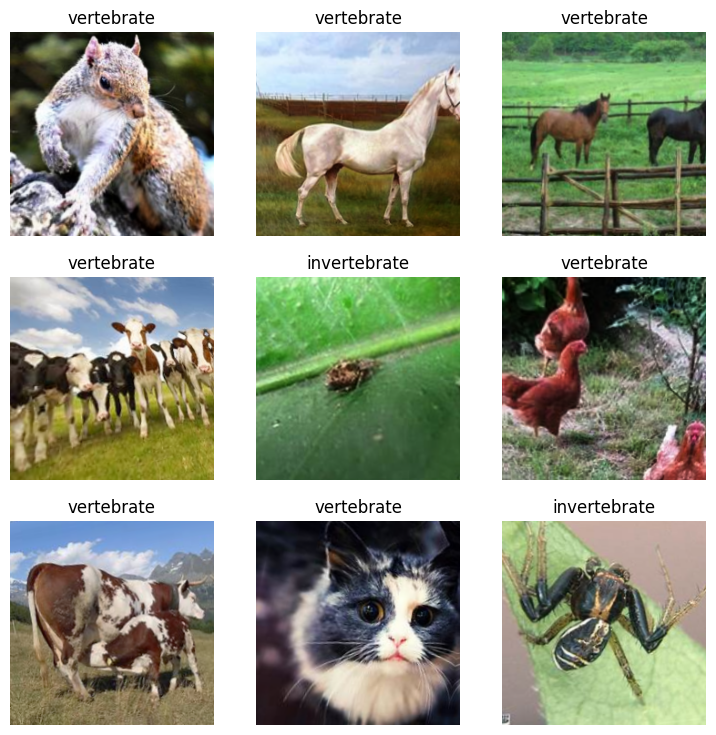

In [13]:
from fastai.vision.all import *
flatten_path = Path("animals10/flattened")

dls = ImageDataLoaders.from_folder(
    flatten_path,
    valid_pct=0.2,       # 20% for validation
    seed=42,             # for reproducibility
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
    bs=16
)

# View some images
dls.show_batch(max_n=9)
print("Classes:", dls.vocab)  # Should print: ['invertebrate', 'vertebrate']


### 🧠 Training the Model with ResNet34

Earlier, I trained the model using `resnet18`, and this time I tried using `resnet34` to see if it made any improvements.  
However, the training speed didn’t improve significantly — it still felt a bit slow.

It helped me realize that just switching the backbone might not be enough.  
Next time, I’d like to experiment with other models that are optimized for speed, or try adjusting other training options like reducing the batch size or image resolution to see if that helps.

This has been a good learning moment for me in terms of not just focusing on accuracy, but also thinking about training efficiency and resource limitations.


In [14]:
# Create learner
learn = vision_learner(dls, resnet34, metrics=accuracy)

# Train for 1 epoch with fit_one_cycle (faster & stable)
learn.fit_one_cycle(1)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 169MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.057820,0.021953,0.994842,1:44:45


### 💾 Saving the Updated Model (ResNet34)

Since I retrained the model using `resnet34` instead of `resnet18`, I decided to save this version separately as `vertebrate_classifier_resnet34.pkl`.  

This helps me keep both versions in case I want to compare their performance or reuse them later.  
It’s a small thing, but being organized with model versions really helps, especially when experimenting with different architectures.
                                                                        Earlier , I had saved the `resnet18` version using the same method as:
```python
learn.export("vertebrate_classifier.pkl")

In [15]:
learn.export("vertebrate_classifier_resnet34.pkl")


### 📁 Verifying That the New Model File Was Saved

Now that I saved the updated model (`vertebrate_classifier_resnet34.pkl`), I ran this quick check to make sure the file actually appeared in the working directory.

It’s a simple sanity check just to confirm that the model was saved properly before I try loading it later.


In [16]:
# Check file is present
import os
print(os.listdir())  # Should show 'vertebrate_classifier.pkl'

['.virtual_documents', 'animals10', 'animals10.zip']


### 🔍 Searching for the Saved Model File

After saving the model, I noticed that it wasn’t showing up in the working directory when I ran `os.listdir()`.  

To figure out what was going on, I used this snippet to search through all the folders inside `/kaggle` and found that the model file had actually been saved inside the `flattened` folder.

This made me realize how important it is to pay attention to where files are being saved, especially when the file paths are nested or reused.  
It was a good reminder to double-check my export paths and to be more intentional with where I save outputs in future projects.


In [17]:
import os

for root, dirs, files in os.walk("/kaggle"):
    for file in files:
        if file.endswith(".pkl"):
            print("Found:", os.path.join(root, file))


Found: /kaggle/working/animals10/flattened/vertebrate_classifier_resnet34.pkl


### 💾 Saving the Model to the Main Directory

This time, I saved the trained model directly to the main working directory (`/kaggle/working/`) as `vertebrate_classifier_resnet34.pkl`.  

Saving the model here makes it easier to find and manage, especially when I want to load it later or share the notebook with others.  
It’s a simple but important step for keeping things organized, especially as projects get bigger and have more files.


In [27]:
learn.export("/kaggle/working/animals10/flattened/vertebrate_classifier_resnet34.pkl")


### 📦 Loading the Trained Model

Now that I’ve trained and saved my model earlier, I’m loading it back into memory using `load_learner`.  
This step is important before making predictions — it tells the notebook to load all the model’s weights, classes, and configuration from the `.pkl` file I saved.

In this case, I'm loading the version trained with **ResNet34**, which I saved inside the `flattened` folder.


In [50]:
learn_inf = load_learner("/kaggle/working/animals10/flattened/vertebrate_classifier_resnet34.pkl")

### 🖼️ Creating an Interactive Prediction Tool (with Widgets)

In this section, I built a simple **user interface** using Python widgets so that anyone can upload an image and test the model in real time.

At first, I had no idea how to do this — so I took help from ChatGPT, tested different things, and slowly learned how to:
- Use `FileUpload` to allow users to upload images
- Create a **"Run Prediction"** button
- Display the uploaded image and show the predicted class with confidence

---

#### 🔧 Challenges I Faced:
- Initially, even **after uploading an image**, the prediction widget kept saying “Please upload an image first.”
- After debugging, I found out that the issue wasn’t with the upload itself — it was the **file format**.
- The model currently only works with **`.jpg`, `.jpeg`, and `.png`** image types.
- Other formats like `.webp`, `.bmp`, or `.heic` weren’t recognized properly, and the model couldn’t read them.
- I also added image conversion to **RGB mode** and some checks to avoid breaking the code when unexpected inputs are given.

---

Now the tool works well for **valid image types (JPG/PNG/JPEG)** and gives clear predictions.  
I still want to explore how to handle other image formats or automatically convert unsupported ones — something I plan to learn in future updates.



In [52]:
from fastai.vision.all import *
from IPython.display import display, clear_output
from PIL import Image, UnidentifiedImageError
import io
import ipywidgets as widgets

# Load model
learn_inf = load_learner("/kaggle/working/animals10/flattened/vertebrate_classifier_resnet34.pkl")

# Create UI widgets
uploader = widgets.FileUpload(accept='image/*', multiple=False)
predict_button = widgets.Button(description="Run Prediction", button_style='success')
output = widgets.Output()

# Store uploaded image
uploaded_img = None

def on_upload_change(change):
    global uploaded_img
    output.clear_output()
    uploaded_img = None

    if uploader.value:
        try:
            # FIX: Get the uploaded file (as list of dicts)
            file_info = list(uploader.value.values())[0] if isinstance(uploader.value, dict) else uploader.value[0]
            img_bytes = file_info['content']
            uploaded_img = Image.open(io.BytesIO(img_bytes)).convert("RGB")

            with output:
                print("✅ Image uploaded and converted successfully:")
                display(uploaded_img)

        except UnidentifiedImageError:
            with output:
                print("❌ Unable to read image. Please upload a valid JPG or PNG image.")
        except Exception as e:
            with output:
                print(f"❌ Unexpected error: {e}")
    else:
        with output:
            print("⚠️ No image uploaded.")

def on_predict_clicked(b):
    output.clear_output()
    if uploaded_img is None:
        with output:
            print("⚠️ Please upload a valid image first.")
    else:
        pred, pred_idx, probs = learn_inf.predict(uploaded_img)
        with output:
            print("📷 Uploaded Image:")
            display(uploaded_img)
            print(f"🔍 Prediction: {pred.upper()}")
            print(f"📊 Confidence: {probs[pred_idx]*100:.2f}%")

# Attach event handlers
uploader.observe(on_upload_change, names='value')
predict_button.on_click(on_predict_clicked)

# Show the UI
display(uploader, predict_button, output)


FileUpload(value=(), accept='image/*', description='Upload')

Button(button_style='success', description='Run Prediction', style=ButtonStyle())

Output()

### 🎉 Now You Can Try Uploading an Image!

Feel free to upload your own animal images to test the model’s predictions.  
For best results, please use images in **JPG, JPEG, or PNG** formats — these are the file types the model handles most reliably.

I tested the model myself with a clear JPG image of a spider and got **100% confidence** predicting it as an invertebrate.  
For some other images, the confidence was around **99%**, which is still good but not perfect. This might be due to factors like image quality, background noise, or animals in poses the model hasn’t seen much during training.

From this, I’ve learned that next time I should:
- Try training with a larger and more diverse dataset
- Experiment with image augmentation techniques to help the model generalize better
- Possibly fine-tune the model longer or try different architectures

These steps could help improve the model’s confidence and accuracy even more!

Try uploading different images and see how the model performs — it’s a fun way to explore what it has learned.



## 🏁 Project Wrap-Up: What I Learned and Built

This was my very first image classification project — and it turned out to be a full-on learning journey!

### 📚 What This Project Was About:
I built a simple deep learning model using FastAI to classify animals as **vertebrates** or **invertebrates**, based on the Animals10 dataset.  
The goal was to explore computer vision from start to finish — and most importantly, to understand what I was doing at each step.

---

### ⚙️ The Steps I Took:
- ✅ Set up the notebook environment (FastAI, Kaggle tools, etc.)
- ✅ Downloaded and explored the Animals10 dataset
- ✅ Faced a few folder and naming issues — the labels were in Italian, not English!
- ✅ Reorganized the folders into vertebrate/invertebrate categories
- ✅ Flattened the folders to make training easier
- ✅ Created `DataLoaders` to feed images and labels into the model
- ✅ Trained the model using `resnet18`, and later tried `resnet34`
- ✅ Saved and loaded the model for later use
- ✅ Built an interactive image uploader and prediction tool using widgets

---

### 🐛 The Challenges I Faced (and Solved!):
- I got errors because the dataset was half-moved from before — so I cleaned and restarted the data setup.
- My original class names were in English, but the folders were in Italian — this took some time to figure out.
- I had to understand how to structure data for FastAI models (flattening folders really helped).
- The prediction widget didn’t work at first — I learned about image formats, widget value structures, and error handling.
- I couldn’t find my saved model at one point — until I searched the entire file system and realized I had saved it inside a nested folder.

---

### 🤖 What I Built:
- A working, trained deep learning model that can classify unseen animal images as vertebrate or invertebrate.
- A notebook that includes not only the code but my process, problems, and reflections.
- A prediction tool that anyone can use by uploading an image!

---

### 🧠 What I Learned:
- How image classification models work
- How to clean and organize datasets properly
- How to debug problems that aren't always obvious
- How to explain my work clearly and honestly
- That even if something doesn't work at first — I can figure it out

---

### 💬 Final Thoughts:
This project wasn’t just about getting the model to work — it was about learning how to learn, how to debug, and how to trust that I can improve with each step.  
I still have a long way to go in data science, but this was a solid beginning.

Thanks for checking out my notebook! 💙
